# Internationaler Vergleich der COVID-19-Infektionen und deren Entwicklung von erster zu zweiter Welle

### Fragestellung:
- Welche Länder hatten die höchsten Infektionszahlen und warum?
- Wie haben sich die Infektionszahlen in den jeweiligen Ländern von erster zu zweiter Welle entwickelt?

### Datenquelle:
https://ourworldindata.org

## 1. Daten beschaffen und laden

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("weekly-covid-cases.csv")
# Die ersten 5 Zeilen anzeigen
df = pd.read_csv('weekly-covid-cases.csv', skiprows=1,
                names=["Country","Code","Day","Reported cases"])
df.head()  

,Country,Code,Day,Reported cases
0,Afghanistan,AFG,2020-01-09,0
1,Afghanistan,AFG,2020-01-10,0
2,Afghanistan,AFG,2020-01-11,0
3,Afghanistan,AFG,2020-01-12,0
4,Afghanistan,AFG,2020-01-13,0


## 2. Daten vorbereiten
- Die Rohdaten sind im Long-Format.
- Zunächst werden die relevanten Monate Januar, Februar und März der Jahre 2020 und 2021 isoliert.
- Danach werden Länder, welche zwar aufgefürt aber nicht als Land gelten, herausgefiltert. China ebenfalls, da es als Ausgangsland logischerweise höhere Zahlen hat.
- Für die Datenanalyse werden die gefilterten Rohdaten pivotiert. Die Zeilen repräsentieren die einzelnen Länder, die Spalten das Datum.

In [28]:
df_pivot = df.pivot(index='Country', columns='Day', values='Reported cases')
df_pivot.head(15)

Day,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2024-11-15,2024-11-16,2024-11-17,2024-11-18,2024-11-19,2024-11-20,2024-11-21,2024-11-22,2024-11-23,2024-11-24
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,71.0,71.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Rohdaten filtern

In [29]:
df['Day'] = pd.to_datetime(df['Day'])

df_prefiltered = df[(df['Day'].dt.year.isin([2020, 2021])) & (df['Day'].dt.month <= 3)]

excluded_countries = [
    'Africa', 'Asia', 'Asia excl. China', 'Europe', 'European Union (27)', 
    'High-income countries', 'Lower-middle-income countries', 
    'Low-income countries', 'North America', 'Oceania', 'South America', 
    'Upper-middle-income countries', 'World', 'World excl. China', 
    'World excl. China and South Korea', 
    'World excl. China, South Korea, Japan and Singapore', "China"
]
df_filtered = df_prefiltered[~df_prefiltered['Country'].isin(excluded_countries)]
df_filtered_pivot = df_filtered.pivot(index='Country', columns='Day', values='Reported cases')
df_filtered_pivot.head(15)

Day,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,168.0,182.0,176.0,182.0,185.0,197.0,191.0,169.0,207.0,262.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3720.0,3726.0,3527.0,3355.0,3357.0,3239.0,3194.0,3100.0,2934.0,2875.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,892.0,845.0,809.0,750.0,701.0,687.0,684.0,679.0,691.0,712.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251.0,256.0,272.0,278.0,294.0,301.0,328.0,333.0,343.0,353.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,353.0,350.0,328.0,347.0,356.0,323.0,335.0,330.0,375.0,408.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,70.0,89.0,88.0,92.0,92.0,89.0,95.0,103.0,64.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53596.0,55904.0,53751.0,58928.0,65064.0,68605.0,71481.0,76307.0,81981.0,92128.0


In "df_filtered" sind nun die Infektionszahlen der gewünschten Länder im gewünschten Zeitraum enthalten.

## 3. Statistik der Rohdaten 

Über die Rohdaten bzw. die gefilterten Rohdaten können folgende Aussagen getroffen werden:
- Die Rohdaten enthält die Infektionszahlen von 250 verschiedenen Ländern. Die gefilterten von 233.
- Von den USA sind am wenigsten Rohdaten vorhanden. Von den gefilterten Rohdaten hingegen mangelt es mit Abstand am meisten and Daten von Thailand.
- Die Rohdaten reichen von Januar 2020 bis zum November 2024.



In [30]:
df_filtered.dtypes #Muess das wück ine? Und wenn ja für was?

Country                   object
Code                      object
Day               datetime64[ns]
Reported cases             int64
dtype: object

### 3.1 Analyse der Länder

In [36]:
print('Anzahl verschiedener Länder: ', len(df['Country'].unique()))

Anzahl verschiedener Länder:  250


In [37]:
print('Anzahl verschiedener Länder: ', len(df_filtered['Country'].unique()))

Anzahl verschiedener Länder:  233


In [38]:
df['Country'].value_counts()

Country
Afghanistan      1782
Reunion          1782
Namibia          1782
Nauru            1782
Netherlands      1782
                 ... 
Thailand         1754
Germany          1278
Spain            1278
France           1270
United States    1228
Name: count, Length: 250, dtype: int64

In [39]:
df_filtered['Country'].value_counts()

Country
Afghanistan      173
New Caledonia    173
Nicaragua        173
Niger            173
Nigeria          173
                ... 
Nepal            172
India            171
Maldives         170
Sri Lanka        167
Thailand         145
Name: count, Length: 233, dtype: int64

### 3.2 Analyse des Zeitraums

In [100]:
import calendar

df_2020 = df[df['Day'].dt.year == 2020]
df_2024 = df[df['Day'].dt.year == 2024]
print('Zeitraum der gemessenen Infektionszahlen: ', calendar.month_abbr[min(df_2020['Day'].dt.month)] , min(df['Day'].dt.year) , '-' , calendar.month_abbr[df_2024['Day'].dt.month.max()] , max(df['Day'].dt.year))

Zeitraum der gemessenen Infektionszahlen:  Jan 2020 - Nov 2024


### 3.3 Anzahl Datenpunkte

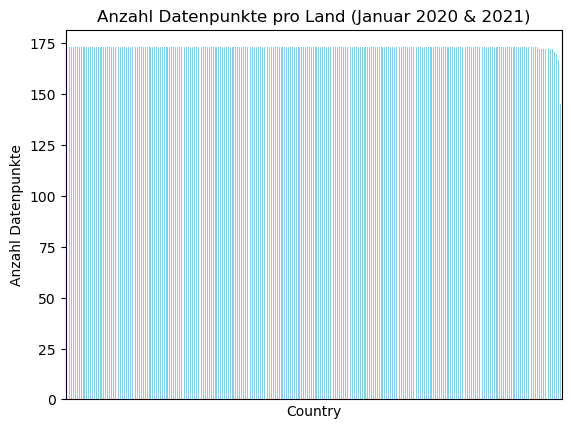

In [ ]:
# Plotten der gefilterten Daten
df_filtered['Country'].value_counts().plot(kind='bar', color='skyblue')  # Optional: Farbe anpassen

# Achsentitel und Diagrammtitel hinzufügen
plt.xticks([])  # Beschriftungen der x-Achse deaktivieren
plt.ylabel('Anzahl Datenpunkte')  # Y-Achsenbeschriftung
plt.title('Anzahl Datenpunkte pro Land (Januar 2020 & 2021)')  # Diagrammtitel

# Diagramm anzeigen
plt.show()

### 3.4 Analyse der Infektionszahlen 2020

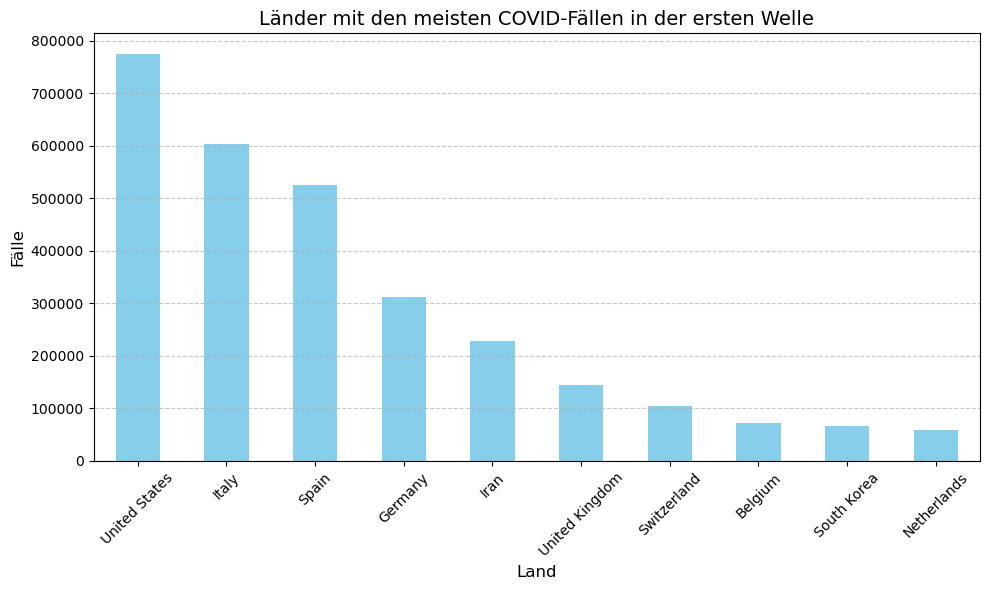

In [122]:
# Daten filtern: Nur für erste Welle
wave_1 = df_filtered[(df_filtered['Day'].dt.year == 2020)]

# Aggregiere die Fälle nach Land
aggwave_1 = wave_1.groupby('Country')['Reported cases'].sum().sort_values(ascending=False)

# Wähle die Top 10 Länder
top_countries_1 = aggwave_1.head(10)

# Plot erstellen
plt.figure(figsize=(10, 6))
top_countries_1.plot(kind='bar', color='skyblue')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Länder mit den meisten COVID-Fällen in der ersten Welle', fontsize=14)
plt.xlabel('Land', fontsize=12)
plt.ylabel('Fälle', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot anzeigen
plt.tight_layout()
plt.show()

### 3.5 Analyse der Infektionszahlen 2021

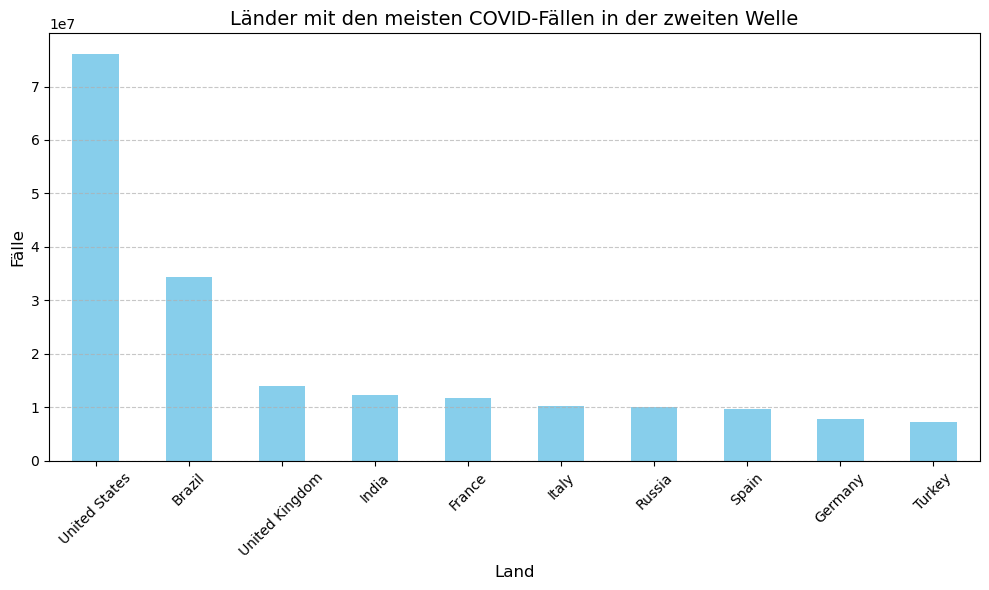

In [123]:
# Daten filtern: Nur für zweite Welle
wave_2 = df_filtered[(df_filtered['Day'].dt.year == 2021)]

# Aggregiere die Fälle nach Land
aggwave_2 = wave_2.groupby('Country')['Reported cases'].sum().sort_values(ascending=False)

# Wähle die Top 10 Länder
top_countries_2 = aggwave_2.head(10)

# Plot erstellen
plt.figure(figsize=(10, 6))
top_countries_2.plot(kind='bar', color='skyblue')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Länder mit den meisten COVID-Fällen in der zweiten Welle', fontsize=14)
plt.xlabel('Land', fontsize=12)
plt.ylabel('Fälle', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot anzeigen
plt.tight_layout()
plt.show()